# Inicialización

In [1]:
# grafico en linea, no necesita plt.show()
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import seaborn as sns # pretty plots

# Regresión Lineal

__Modelo:__ $$y = w \tilde{x}$$
__Funcion objetivo:__ $$J = \frac{1}{2} \sum_{i=1}^{b}(y_i - w \tilde{x})^2$$
__Solución:__ $$ w = Y \tilde{X}^T (\tilde{X} \tilde{X}^T)^{-1}  $$

El archivo con datos de __grillos__ consiste en 2 columnas X;Y ,
* __X__ medición _cri cri / seg_ de grillos.
* __Y__ temperatura en farenheit

In [2]:
# cargar datos
data = np.loadtxt('datos/crickets.csv', delimiter=',')

X = data[:, 0]
Y = data[:, 1]

In [3]:
# configuracion graficos
sns.set()  # estilo por defecto de seaborn
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5) # contexto notebook 
plt.rcParams['figure.figsize'] = (16, 6)  # tamaño por defecto de las figuras

Text(0.5,1,'Linear regression for Cricket dataset')

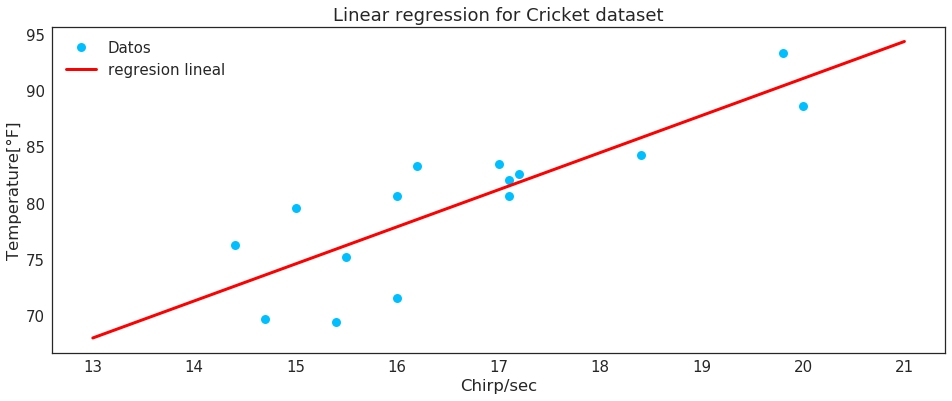

In [4]:
# vector x extendido
X_tilda = np.vstack((X, np.ones(len(X))))
# inversa
XX_inv = np.linalg.inv(X_tilda.dot(X_tilda.T))
# pesos optimos
w_opt = Y.dot(X_tilda.T).dot(XX_inv)

# query/prediccion
X_tilda_reg = np.vstack((np.linspace(13, 21, 9), np.ones(9)))

# plot 
plt.plot(X, Y, 'o', c='#00BFFF',ms=9, label='Datos')
plt.plot(X_tilda_reg[0, :], w_opt.dot(X_tilda_reg), 'r', lw=3, label='regresion lineal')
plt.legend()
plt.xlabel('Chirp/sec')
plt.ylabel('Temperature[°F]')
plt.title('Linear regression for Cricket dataset')
# plt.savefig('../apunte/img/reg_lin_1.pdf')

# Regresión Lineal Bayesiana

__Modelo:__ $$y = x^T w + \epsilon  \quad ,\epsilon \sim \mathcal{N}(0, \sigma_n^2)$$ 

__Likelihood:__ $$\mathcal{N}(X^T w, \sigma_n^2 I) $$

__Prior:__ $$ w\sim \mathcal{N}(w_0, V_0)$$

__<font color='red'>Posterior:</font>__ $$ p(w|y, x, \sigma) = \mathcal{N}(w^*, V^*) \\ 
w^* = V^* V_0^{-1}w_0 + \sigma^{-2} V^* X^T Y\\
V^* = \sigma^2(\sigma^2 V_0^{-1} + X^T X)^{-1}$$

## Generar datos

In [5]:
n = 250 # number of observations
x = np.random.uniform(-5, 5, n) # datos sacados de una normal(0,1)

#cambiar los siguientes tres parámetros para generar distintos ejemplos
a = 1.5 # slope parameter | pendiente
b = -2 # offset parameter | intercepto | bias
sigma = 0.5  # aditive noise
y = a*x + b + np.random.normal(0, sigma, n) # observations follow a linear Gaussian model

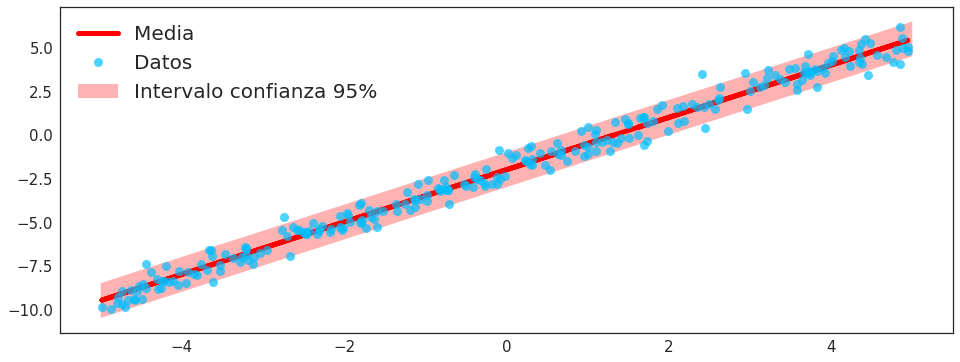

In [6]:
# plot
# recta
plt.plot(x, a * x + b, 'r', lw=5, label='Media')
# intervalo
plt.fill_between(
    [-5, 5],
    a * np.array([-5, 5]) + b - 2 * sigma,
    a * np.array([-5, 5]) + b + 2 * sigma,
    facecolor='red',
    alpha=0.3,
    label='Intervalo confianza 95% ')
plt.plot(x, y, 'o', c='#00BFFF', ms=9, alpha=0.7, label='Datos')
plt.legend(loc=0, fontsize=20)

## Prior

In [7]:
# prior distribution on w is Gaussian with mean and variance:
V0 = np.array([[1,0],[0,1]]) 
w0 = np.array([0,0])

## Posterior y simulación

/home/alejandro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
  from ipykernel import kernelapp as app
/home/alejandro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/home/alejandro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/home/alejandro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
/home/alejandro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:62: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/home/alejandro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:67: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/home/alejandro/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarnin

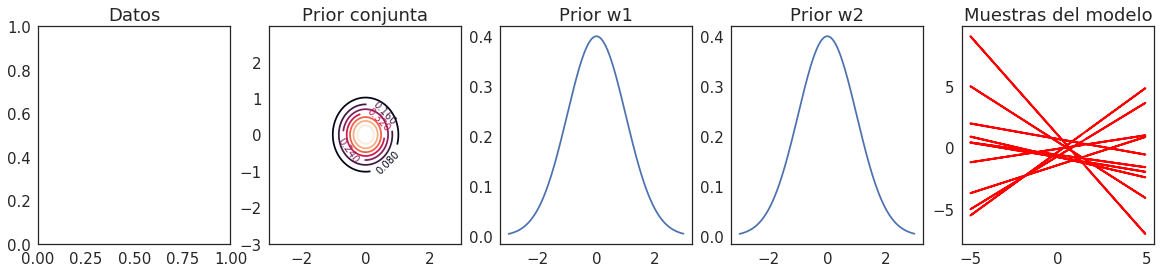

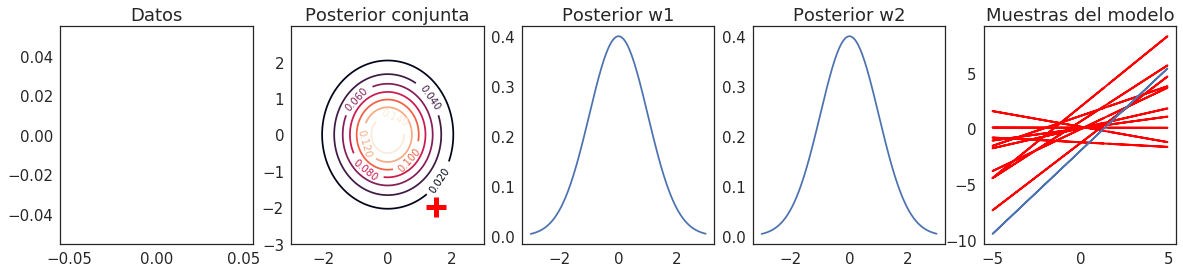

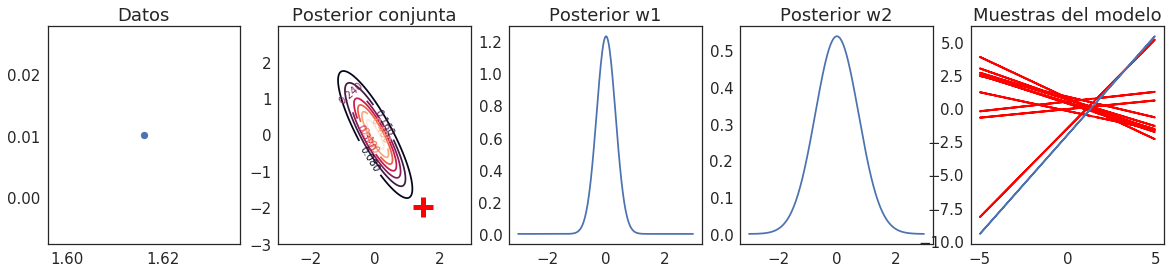

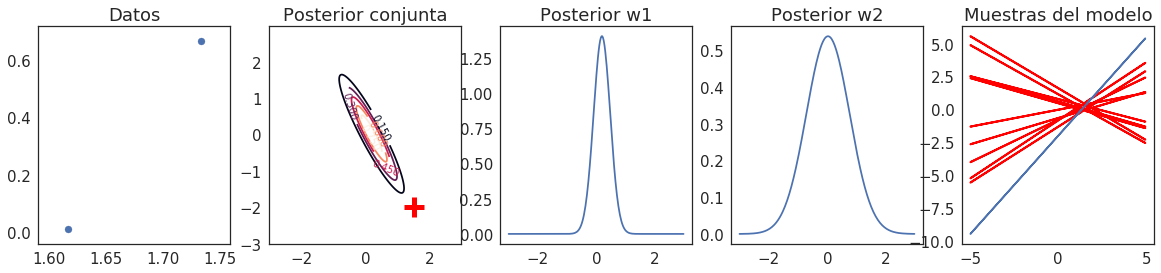

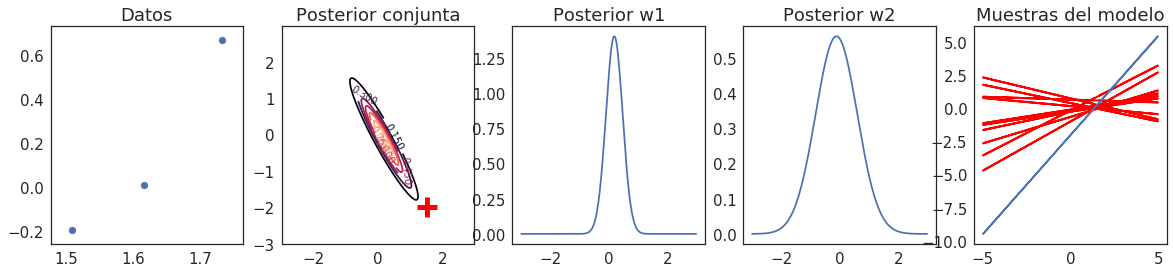

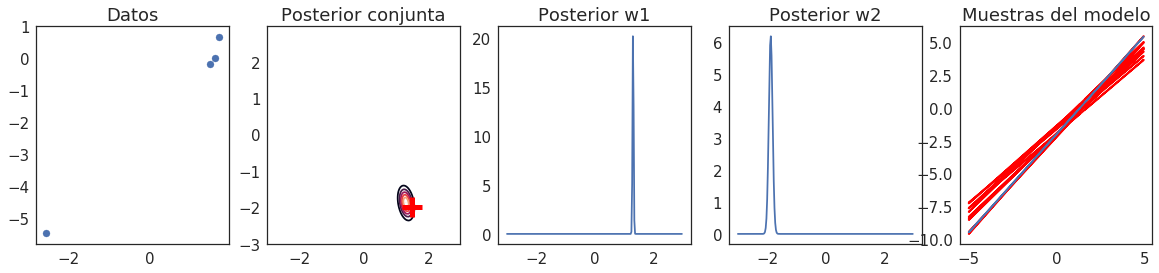

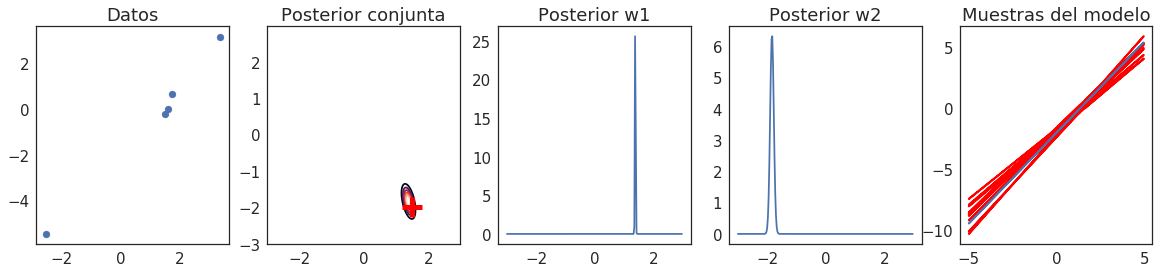

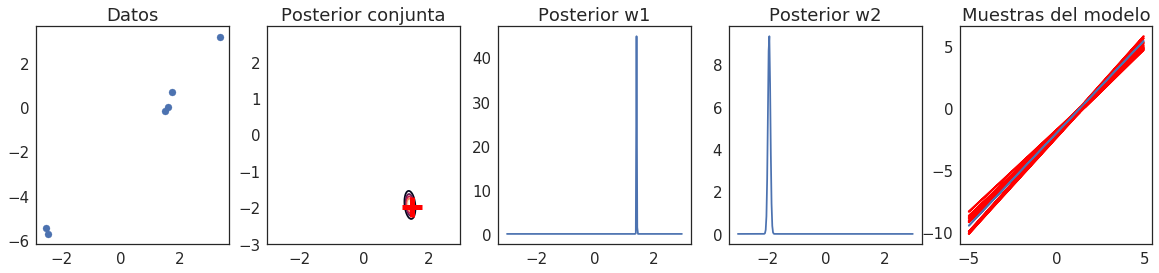

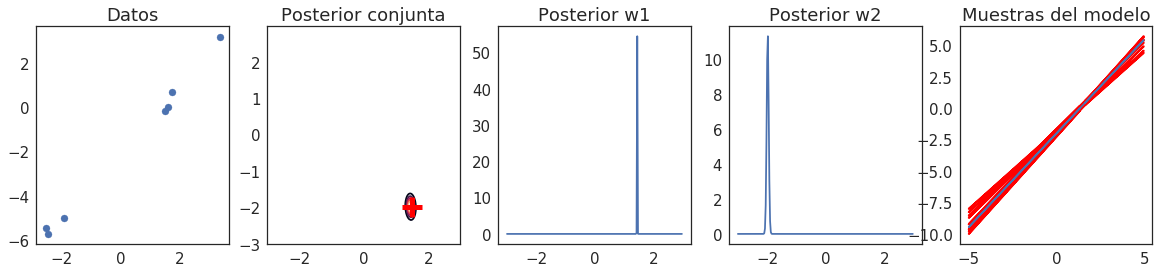

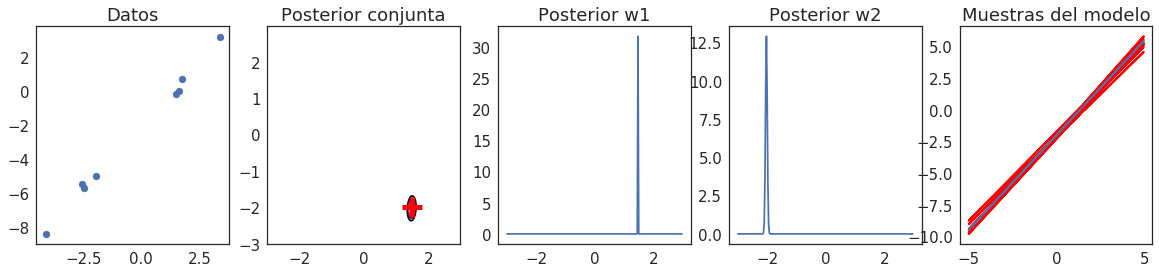

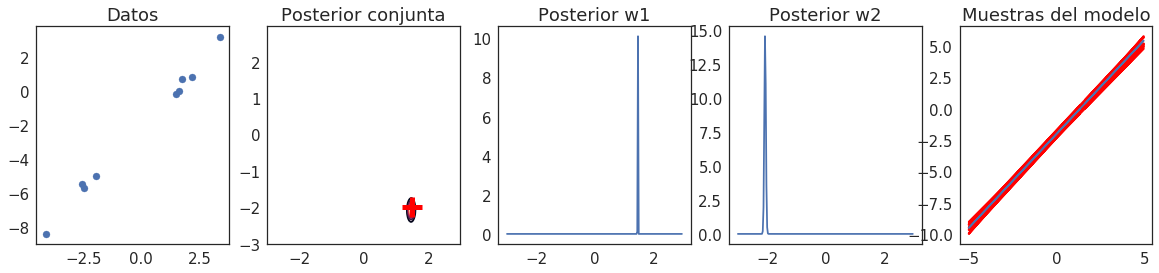

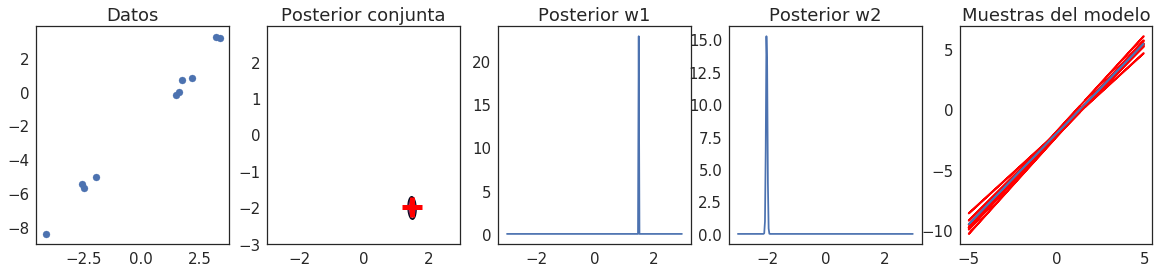

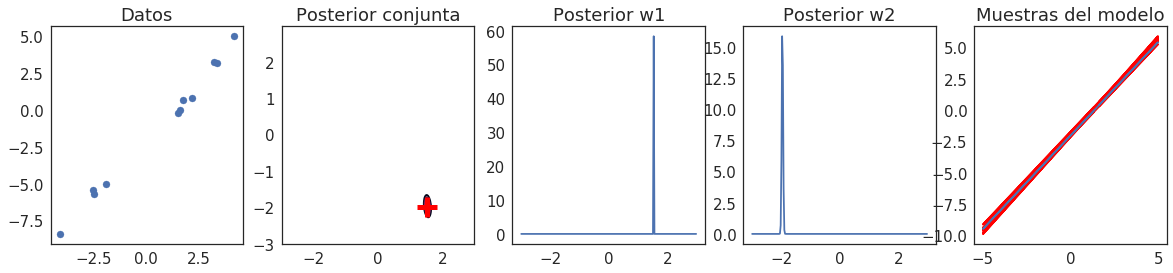

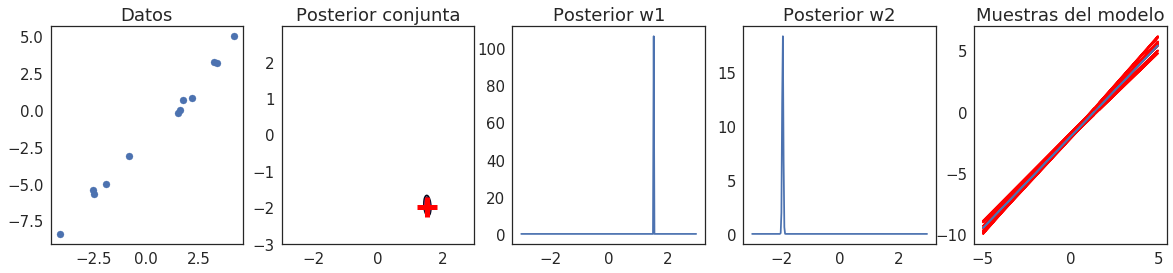

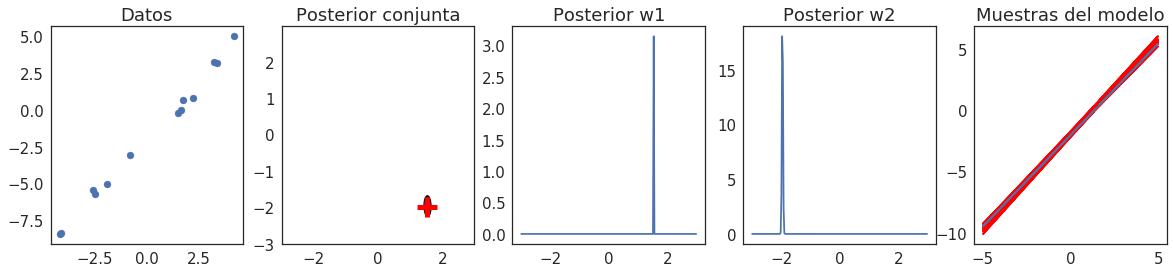

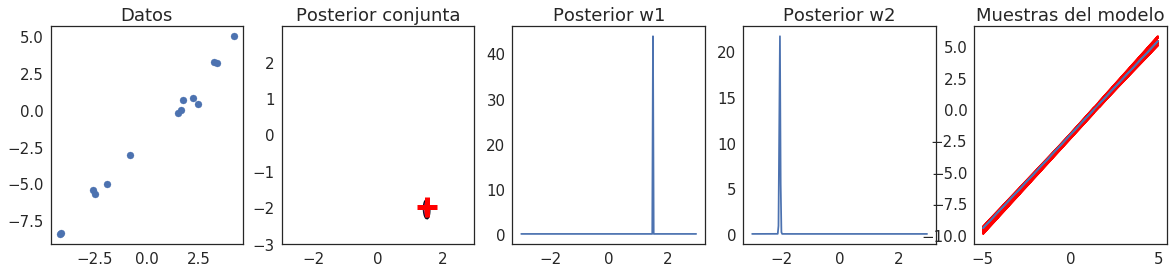

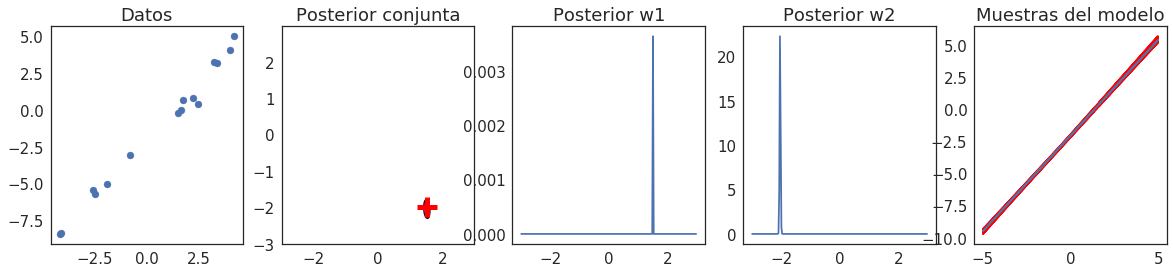

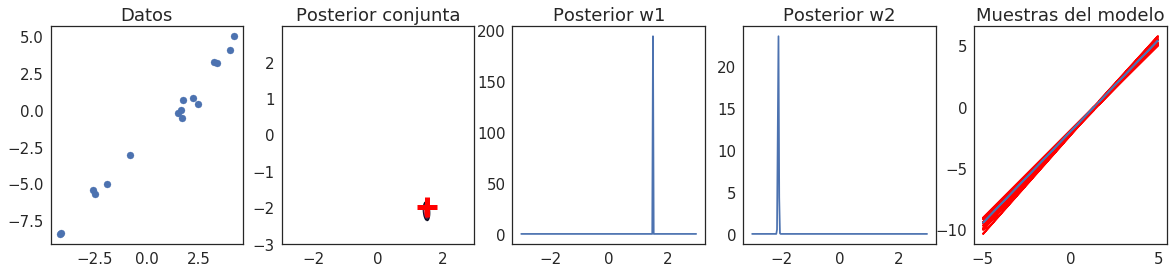

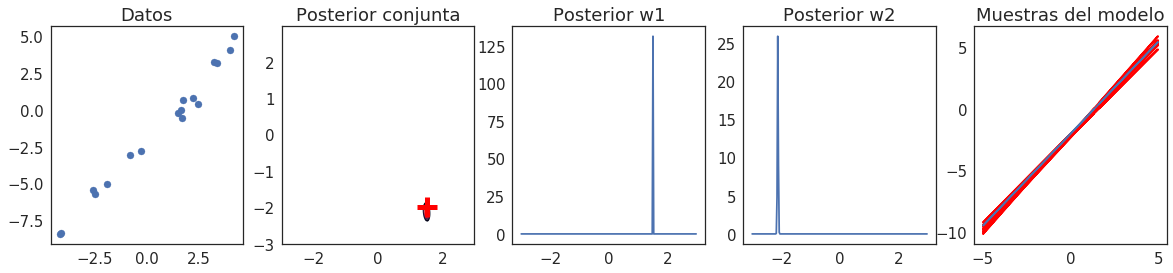

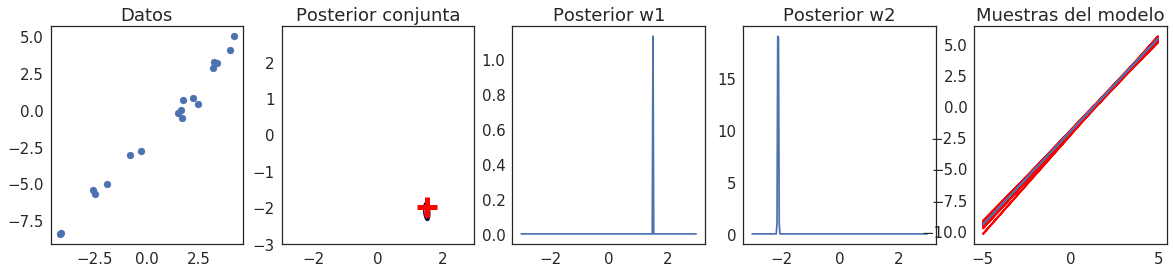

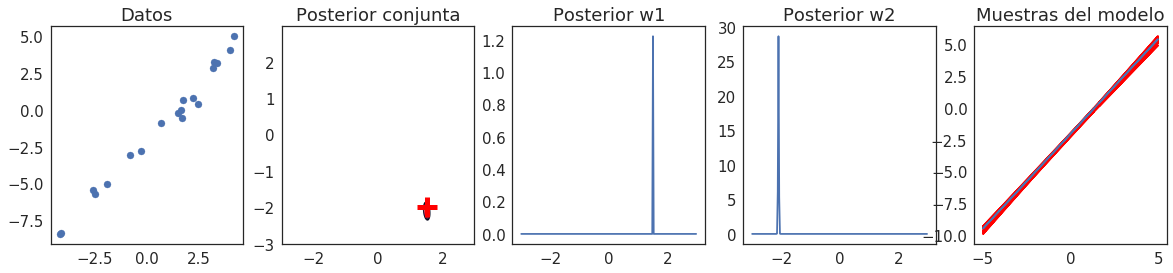

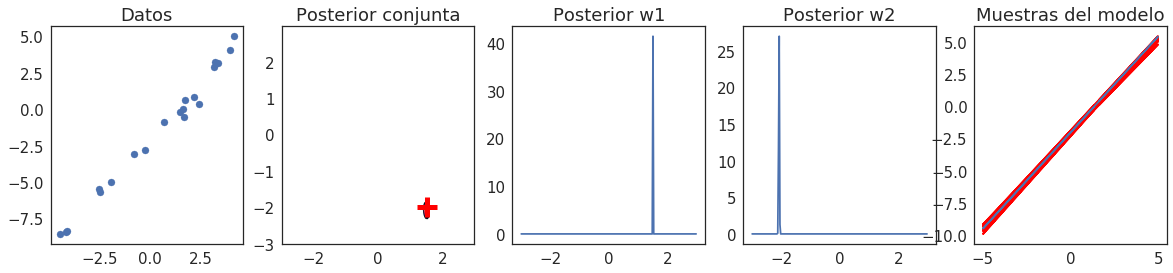

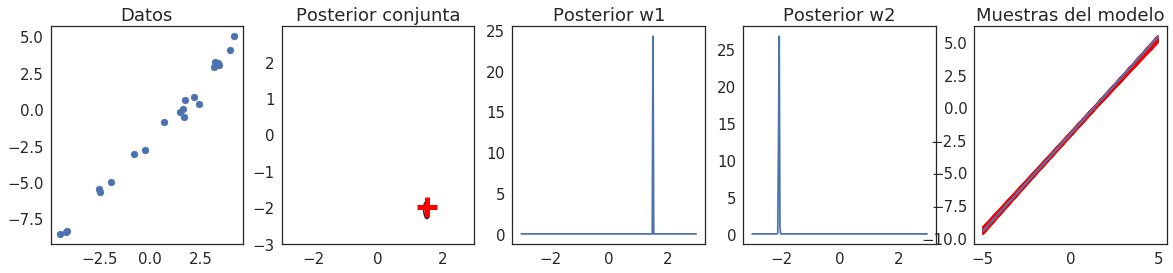

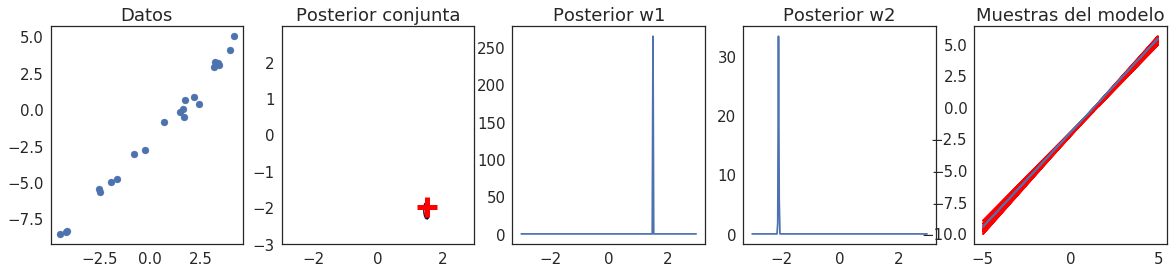

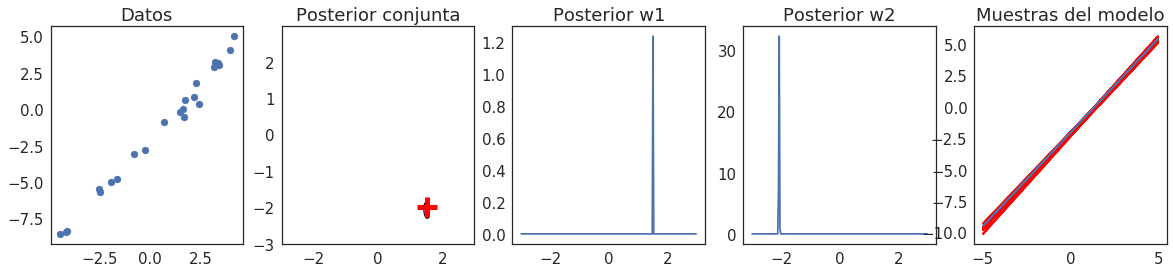

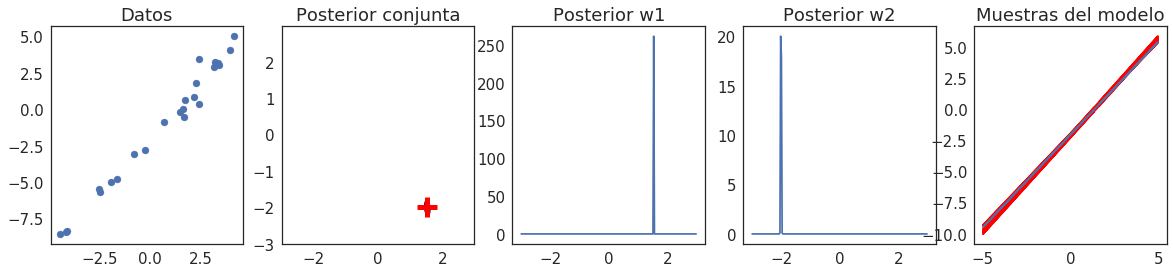

In [8]:

f, axarr = plt.subplots(1,5,figsize=(20,4))
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)

#datos
axarr[0].set_title('Datos')

# distribución conjunta
axarr[1].set_title('Prior conjunta')
axarr[1].plot(a, b, 'r+' ,ms=20)
delta = 0.025
w1_plot = np.arange(-3.0, 3.0, delta)
w2_plot = np.arange(-3.0, 3.0, delta)
W1, W2 = np.meshgrid(w1_plot, w2_plot)
Z1 = mlab.bivariate_normal(W1, W2, V0[0,0]*0.5,V0[1,1]*0.5, w0[0], w0[1], V0[0,1])
CS = axarr[1].contour(W1, W2, Z1)
plt.clabel(CS, inline=1, fontsize=10)

#distribución marginal w1
axarr[2].set_title('Prior w1')
Z2 = mlab.normpdf(w1_plot, w0[0],  V0[0,0])
CS = axarr[2].plot(w1_plot, Z2)

#distribución marginal w2
axarr[3].set_title('Prior w2')
Z3 = mlab.normpdf(w1_plot, w0[1],  V0[1,1])
CS = axarr[3].plot(w1_plot, Z3)

#muestras del modelo
axarr[4].set_title('Muestras del modelo')
for i in range(0, 10):
    w =np.random.multivariate_normal(w0, V0)
    CS = axarr[4].plot(x,w[0]*x + w[1, np.newaxis], 'r',lw=2)



for i in range(0, 25):
    #compute statistics w y V
    invV0 = np.linalg.inv(V0)
    x_tilde=np.vstack((x[:i],np.ones(i)))
    V = sigma**2 * np.linalg.inv(sigma**2*invV0 + np.dot(x_tilde,x_tilde.T))
    w = np.dot(np.dot(V,invV0),w0.T)+np.dot(np.dot(V,x_tilde),y[:i])/sigma**2

    
    f, axarr = plt.subplots(1,5,figsize=(20,4))
    plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)

    #datos
    axarr[0].set_title('Datos')
    axarr[0].scatter(x[:i], y[:i])

    # distribución conjunta
    axarr[1].set_title('Posterior conjunta')
    axarr[1].plot(a, b, 'r+' ,mew=5,ms=20)
   
    Z1 = mlab.bivariate_normal(W1, W2,V[0,0]**0.5,V[1,1]**0.5, w[0], w[1], V[0,1])
    CS = axarr[1].contour(W1, W2, Z1)
    plt.clabel(CS, inline=1, fontsize=10)

    #distribución marginal w1
    axarr[2].set_title('Posterior w1')
    Z2 = mlab.normpdf(w1_plot, w[0],  V[0,0])
    CS = axarr[2].plot(w1_plot, Z2)

    #distribución marginal w2
    axarr[3].set_title('Posterior w2')
    Z3 = mlab.normpdf(w1_plot, w[1],  V[1,1])
    CS = axarr[3].plot(w1_plot, Z3)

    #muestras del modelo
    axarr[4].set_title('Muestras del modelo')
    for j in range(0, 10):
        w_sample =np.random.multivariate_normal(w, V)
        CS = axarr[4].plot(x,w_sample[0]*x + w_sample[1, np.newaxis], 'r',lw=2)
    axarr[4].plot(x, a*x+b)